In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def morphological_reconstruction(marker: np.ndarray, mask: np.ndarray):
    kernel = np.ones(shape=(7, 7), dtype=np.uint8) * 255
    while True:
        expanded = cv2.dilate(src=marker, kernel=kernel)
        expanded = cv2.bitwise_and(src1=expanded, src2=mask)

        if (marker == expanded).all():
            return expanded
        marker = expanded

In [12]:
def remove_border_touching_elements(img_path: str):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    h, w = img.shape

    mask = np.zeros_like(img)

    border = cv2.rectangle(mask, (1, 1), (w-1, h-1), (255,255,255), 1)

    marker = cv2.bitwise_and(img, img, mask=border)

    border_touching_elements = morphological_reconstruction(marker, img)

    plt.title('Border touching elements (morphological reconstruction)')
    plt.imshow(border_touching_elements, 'gray')
    plt.show()

    result = cv2.bitwise_xor(img, border_touching_elements)
    return result

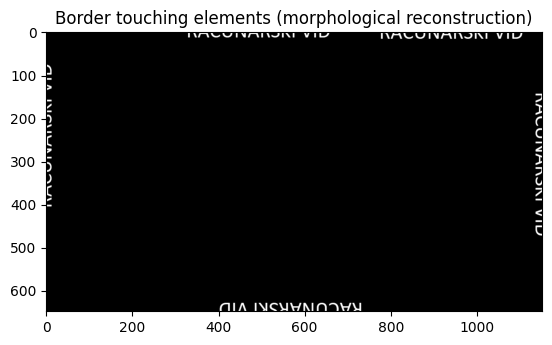

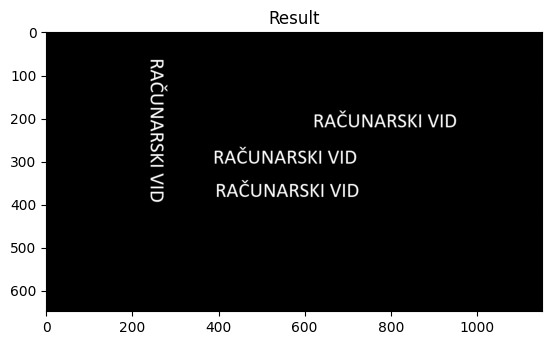

In [13]:
result1 = remove_border_touching_elements('slika1.jpg')

plt.title('Result')
plt.imshow(result1, 'gray')
plt.show()


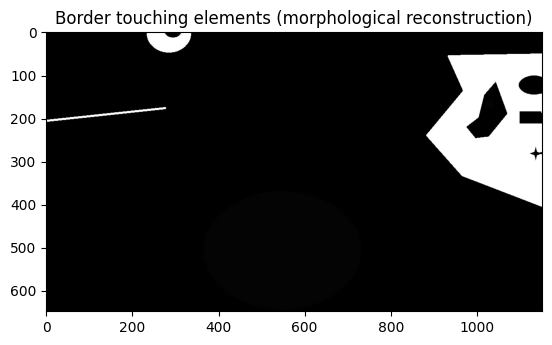

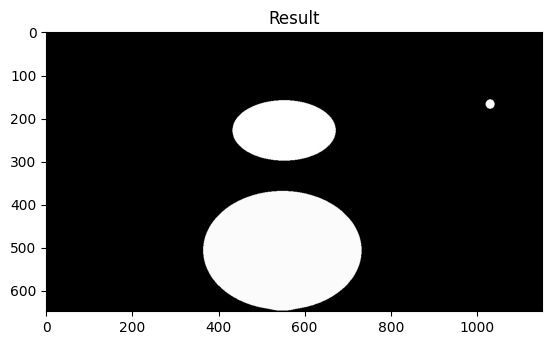

In [14]:
result2 = remove_border_touching_elements('slika2.jpg')

plt.title('Result')
plt.imshow(result2, 'gray')
plt.show()